<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Theboys/Theboys_Assignment_7_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Theboys - Assignment 7 Pandas
1. Pang Chern Hong | MCS231006
2. Nian Cong    | MCS231007
3. Wu Jiaming    | MCS221033
4. Liu Kaiyuan   | MCS231020


Dataset link:https://www.kaggle.com/datasets/forgemaster/steam-reviews-dataset?select=reviews-1230-2345.csv

About Dataset

This dataset contains a collection of user reviews of video games in the Steam Store with a plethora of information about each review such as steam id, app id, playtime, the review text, like/dislike, timestamp of review created, timestamp of review updated, etc, scraped from the STEAM API. (https://partner.steamgames.com/doc/store/getreviews)

All information gathered here is publicly available, and no registration for API key was required for accessing the data.

In [ ]:

# Upload kaggle.json API token, and download / unzip steam reviews Dataset

# Install and upload the kaggle.json file
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d forgemaster/steam-reviews-dataset


Saving kaggle.json to kaggle.json
100% 1.93G/1.93G [00:21<00:00, 142MB/s]
100% 1.93G/1.93G [00:21<00:00, 98.0MB/s]


In [ ]:
!unzip steam-reviews-dataset.zip

Archive:  steam-reviews-dataset.zip
  inflating: reviews-1-115.csv       
  inflating: reviews-11265-13495.csv  
  inflating: reviews-115-1230.csv    
  inflating: reviews-1230-2345.csv   
  inflating: reviews-13495-13500.csv  
  inflating: reviews-13500-13537.csv  
  inflating: reviews-13537-27075.csv  
  inflating: reviews-2345-4575.csv   
  inflating: reviews-4575-6805.csv   
  inflating: reviews-6805-9035.csv   
  inflating: reviews-9035-11265.csv  


In [ ]:
%time
import pandas as pd
df = pd.read_csv("reviews-1230-2345.csv")
df

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561199012934585,204100,True,0,0,0.000000,1671,1660,37,10,A masterpiece that is extremely underrated. Th...,1619063926,1619063926
1,76561198123483551,204100,True,0,0,0.000000,3143,3143,83,14,Amazing!!!,1619062713,1619062713
2,76561197993895820,204100,False,1,0,0.000000,787,746,123,2,The latest update forces the install of some R...,1619058151,1619058151
3,76561197972464391,204100,True,0,0,0.000000,1012,1006,191,20,Classic Payne\n,1619052527,1619052527
4,76561198242204348,204100,True,0,0,0.000000,414,414,54,28,Not like 1 and 2 of the series but its alright.,1619047384,1619047384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067676,76561198014752589,266190,True,33,3,0.571717,150,140,45,2,Ther game is fun. The building system is diffe...,1451254815,1451254815
3067677,76561197997328781,266190,True,5,0,0.483226,17,17,605,52,It's not like I don't see what you're going fo...,1448685112,1448685165
3067678,76561197980157613,266190,False,21,7,0.473769,14,14,217,36,This game is fairly pretty but at this point s...,1447780638,1447780664
3067679,76561198027695358,266190,False,13,6,0.412072,9,9,369,5,I'll be honest and say I played this game for ...,1447705488,1447705488


We will focus on df4 which is the review-1230-2345.csv dataset since it is slightly more than 1 GB.

In [ ]:
import time
import psutil
import pandas as pd

# Calculate Processing time
start_time = time.time()

df= pd.read_csv("/content/reviews-1230-2345.csv")

end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Processing Time: 13.43 seconds
CPU Usage: 2.0%
Memory Usage: 21.7%
System RAM Usage: 21.7%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067681 entries, 0 to 3067680
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   steamid                 int64  
 1   appid                   int64  
 2   voted_up                bool   
 3   votes_up                int64  
 4   votes_funny             int64  
 5   weighted_vote_score     float64
 6   playtime_forever        int64  
 7   playtime_at_review      int64  
 8   num_games_owned         int64  
 9   num_reviews             int64  
 10  review                  object 
 11  unix_timestamp_created  int64  
 12  unix_timestamp_updated  int64  
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 283.8+ MB


In [ ]:
# Selecting only numeric columns (integers and floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Finding the maximum value for each numeric column
max_values = numeric_columns.max()

print("Maximum values for each numeric column:")
print(max_values)

Maximum values for each numeric column:
steamid                   7.656120e+16
appid                     2.661900e+05
votes_up                  2.821600e+04
votes_funny               4.294967e+09
weighted_vote_score       9.798331e-01
playtime_forever          3.276720e+06
playtime_at_review        2.580531e+06
num_games_owned           2.401300e+04
num_reviews               5.236000e+03
unix_timestamp_created    1.619083e+09
unix_timestamp_updated    1.619083e+09
dtype: float64


In [ ]:
df.isnull().sum()

steamid                      0
appid                        0
voted_up                     0
votes_up                     0
votes_funny                  0
weighted_vote_score          0
playtime_forever             0
playtime_at_review           0
num_games_owned              0
num_reviews                  0
review                    4456
unix_timestamp_created       0
unix_timestamp_updated       0
dtype: int64

In [ ]:
df_change_type = df.copy()

df_change_type.appid = df_change_type.appid.astype('uint32')
df_change_type.steamid = df_change_type.steamid.astype('uint32')
df_change_type.votes_up = df_change_type.votes_up.astype('uint32')
df_change_type.votes_funny = df_change_type.votes_funny.astype('uint32')
df_change_type.playtime_forever = df_change_type.playtime_forever.astype('uint32')
df_change_type.playtime_at_review = df_change_type.playtime_at_review.astype('uint32')
df_change_type.weighted_vote_score = df_change_type.weighted_vote_score.astype('float32')
df_change_type.num_games_owned = df_change_type.num_games_owned.astype('uint16')
df_change_type.num_reviews = df_change_type.num_reviews.astype('uint16')
df_change_type.unix_timestamp_created = df_change_type.unix_timestamp_created.astype('uint32')
df_change_type.unix_timestamp_updated = df_change_type.unix_timestamp_updated.astype('uint32')

df_change_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067681 entries, 0 to 3067680
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   steamid                 uint32 
 1   appid                   uint32 
 2   voted_up                bool   
 3   votes_up                uint32 
 4   votes_funny             uint32 
 5   weighted_vote_score     float32
 6   playtime_forever        uint32 
 7   playtime_at_review      uint32 
 8   num_games_owned         uint16 
 9   num_reviews             uint16 
 10  review                  object 
 11  unix_timestamp_created  uint32 
 12  unix_timestamp_updated  uint32 
dtypes: bool(1), float32(1), object(1), uint16(2), uint32(8)
memory usage: 143.4+ MB


In [ ]:
from sys import getsizeof
# The size of the original data set
start_size = getsizeof(df)/(1024.0**3)
end_size = getsizeof(df_change_type)/(1024.0**3)
print('Dataframe size before changed: %2.2f GB'%start_size)
print('Dataframe size after changed: %2.2f GB'%end_size)

Dataframe size before changed: 1.23 GB
Dataframe size after changed: 1.09 GB


<Axes: >

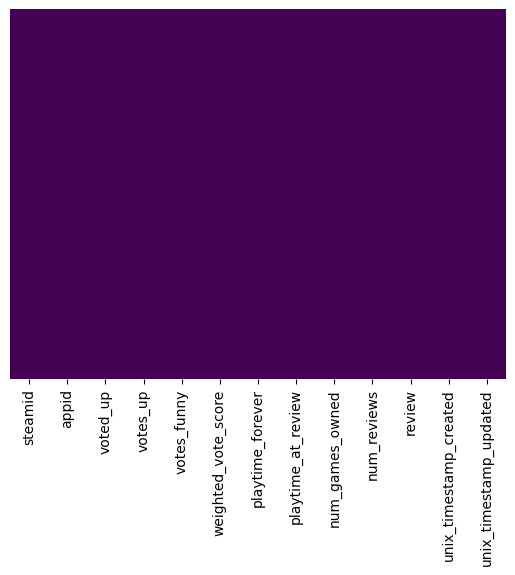

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We cannot see the null values in the graph because the proportion is too small in the datasets, whatever we can choose to drop the review column but since there is just a little null values we decide to keep it.

Now we check the standard deviation and mean of playtime and number of games owned based on app ID.

In [ ]:
%%time
df_group = df.groupby(by='appid').agg({'playtime_at_review': ['mean', 'std'], 'num_games_owned': ['mean', 'std']})
df_group

CPU times: user 135 ms, sys: 5 ms, total: 140 ms
Wall time: 151 ms


playtime_at_review               num_games_owned            
                     mean           std            mean         std
appid                                                              
204100        1212.505420   4225.594320      283.283642  377.038969
204120        1179.624733   1521.846114      184.498934  340.747724
204180         319.828061   1338.336821      454.180193  766.100925
204220         405.233333    611.154119      683.766667  853.128752
204240         306.767956    855.010653      446.009208  691.363235
...                   ...           ...             ...         ...
266110         777.663842   1247.930158      497.632768  942.218400
266130         677.979798    993.294214      314.280303  360.799507
266150       45866.000000  96061.135125      156.400000  151.816666
266170        1920.417722   2651.392229      335.160338  335.453689
266190         230.848485    584.960071      283.363636  284.629348

[891 rows x 4 columns]

Here is the sum of the number of users who own the game based on app ID.

In [ ]:
%%time
# Number of reviews for different games
df.groupby('appid').size()

CPU times: user 29.3 ms, sys: 0 ns, total: 29.3 ms
Wall time: 29.7 ms


appid
204100    12269
204120      469
204180      727
204220       30
204240     1086
          ...  
266110      354
266130     1188
266150        5
266170      237
266190       66
Length: 891, dtype: int64

###Count the number of playtime with more than 1000 hours

In [ ]:


# Create pandas DataFrame
df_pandas = df.copy()
# Use pandas first

# Record start time
start_time = time.time()

# Filter reviews for playtime with more than 1000 hours
counts_pandas = df_pandas[df_pandas['playtime_at_review'] > 1000]['playtime_at_review'].count()

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

print(f"Counts: {counts_pandas}")

Processing Time: 0.16 seconds
CPU Usage: 3.5%
Memory Usage: 41.8%
System RAM Usage: 41.8%
Counts: 1658816


## EDA Visualization

###1. What is the number of reviews according to the app ID?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
%%time

reviews_count = df.groupby('appid').size().reset_index(name='count')
result_count = reviews_count.sort_values(by='count', ascending=False).head(10)
result_count

CPU times: user 31.6 ms, sys: 0 ns, total: 31.6 ms
Wall time: 31.6 ms


,appid,count
711,252490,251890
726,252950,193048
204,218620,116898
240,221100,113205
857,264710,89936
527,242760,86817
323,227300,63074
678,251570,60458
660,250900,57414
564,244850,50868


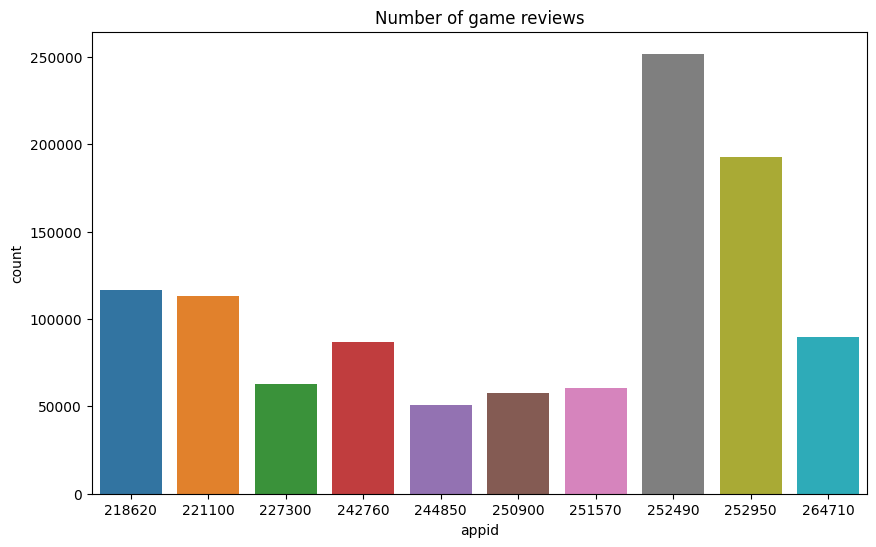

CPU times: user 205 ms, sys: 105 ms, total: 310 ms
Wall time: 192 ms


In [ ]:
%%time
plt.figure(figsize=(10,6))
sns.barplot(x='appid', y='count',data=result_count).set(title="Number of game reviews")
plt.show()

2. What is the distribution of positive comment and negative comment over this dataset?

<Axes: xlabel='voted_up', ylabel='count'>

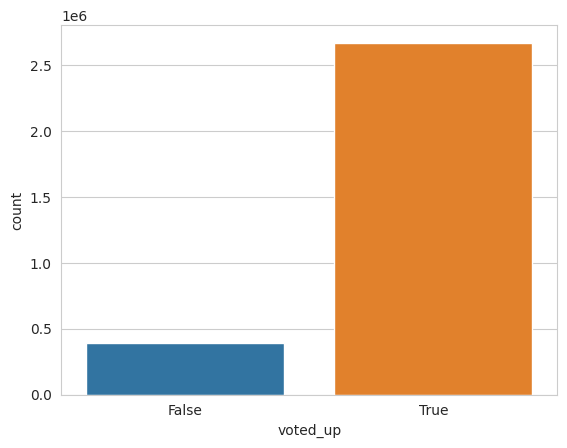

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='voted_up',data=df)

This showed the ratio of false to true in voted_up features have a ratio nearly to 0.4:2.6

3. What is the range of playtime based on the positive comment and negative comment?

<Axes: xlabel='voted_up', ylabel='playtime_forever'>

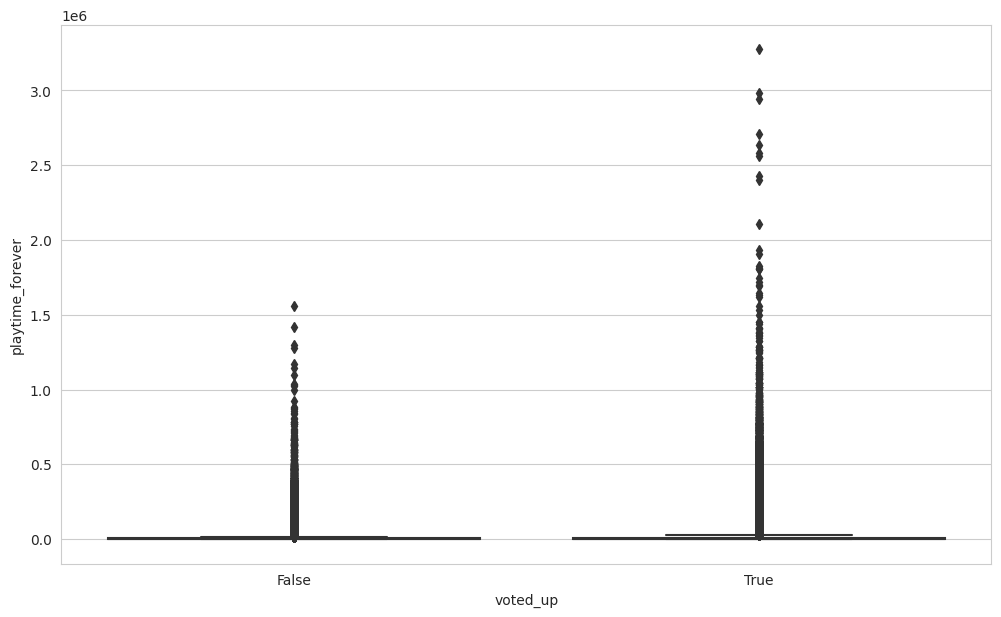

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='voted_up',y='playtime_forever',data=df,palette='winter')

In [ ]:
df.playtime_forever.max()

3276720

Generally the people who rate True in the voted_up are having more playtime_forever than the people who rate False.

4. What is the distribution of positive rating based on app ID?

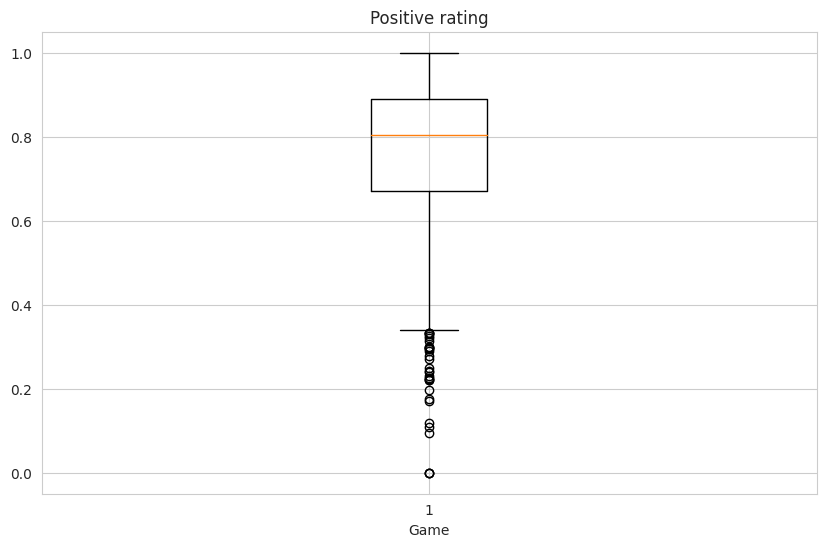

CPU times: user 216 ms, sys: 109 ms, total: 325 ms
Wall time: 209 ms


In [ ]:
%%time

proportion_Goodreviews = df.groupby('appid')['voted_up'].mean().reset_index(name='proportion_true')
plt.figure(figsize=(10, 6))
plt.boxplot(proportion_Goodreviews['proportion_true'])
plt.title('Positive rating')
plt.xlabel('Game')
plt.show()

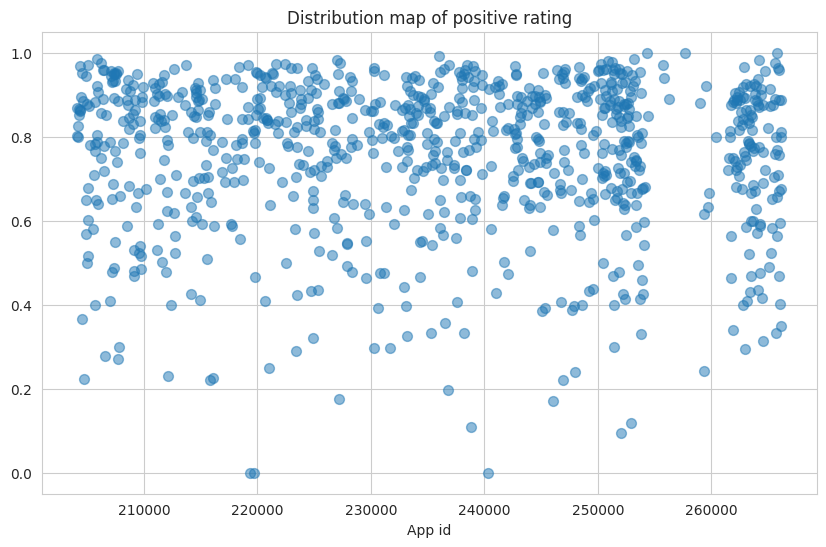

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(proportion_Goodreviews['appid'], proportion_Goodreviews['proportion_true'], s=50, alpha=0.5)
plt.title('Distribution map of positive rating')
plt.xlabel('App id')
plt.show()

###Pros and Cons of using Pandas

**Pros**:

1. **Data manipulating**: Pandas has 2 structure which are series and dataframe that are enable users to easily manipulate the data. It also has a variety of function that can be used for data cleaning and preprocessing.

2. **Flexibility**: Pandas can alter the index with columns and also able to integrate with the NumPy functions. It also help us to aligh data based on labels we selected, and it can process time-series data such as stock market prices.

3. **Community and Documentation**: There is a big and active community of Pandas users, that means we can find resources, documentations, examples or case studies and solutions easily in the internet.

**Cons**

1. **Memory usage**: Although Pandas is a convenient tool, it is also memory intensive, particularly when it came to large dataset, some big data management techniques such as fine tuning or sampling should be applied to overcome it but also will make the dataset lack of representability.

2. **Performance**: Pandas is using single core of the computer to process the data, which means it do not perform efficiently like Dask with the multi-cores computers that can process the data parallely and do distributed computing.

**Conclusion**

In Summary, despite these cons, Pandas is still a powerful and versatile library for data manipulation and analysis in the Python. The flexibility and usefulness of Pandas always let users tried out all efforts to make the data accesible to Pandas to ease their works.





